# Parte I.- Operaciones aritméticas



## *Ejercicio 1: Suma de imágenes*

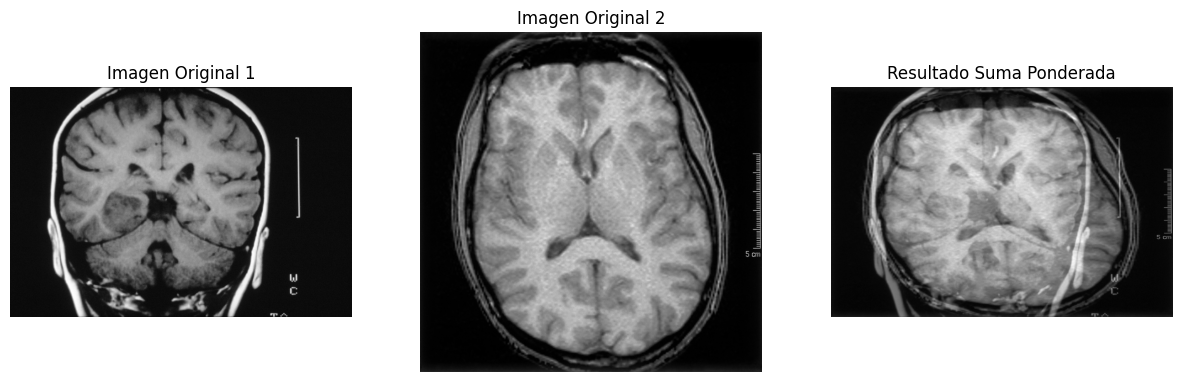

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar las dos imágenes
img2 = cv2.imread("/content/IMG_1.jpg", cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread("/content/IMG_2.jpg", cv2.IMREAD_GRAYSCALE)

# Redimensionar ambas imágenes al mismo tamaño si es necesario
# Comparar tamaños y ajustar la imagen más grande
if img1.shape[0] * img1.shape[1] > img2.shape[0] * img2.shape[1]:
    # img1 es más grande, ajustar img1 a tamaño de img2
    img1_res = cv2.resize(img1, (img2.shape[1], img2.shape[0]))
    img2_res = img2  # img2 ya tiene el tamaño menor
else:
    # img2 es más grande o tienen el mismo tamaño, ajustar img2 a tamaño de img1
    img1_res = img1  # img1 ya tiene el tamaño menor o igual
    img2_res = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# Aplicar la suma ponderada con pesos α=0.7 y β=0.3
alpha = 0.4  # Peso de la primera imagen
beta = 0.6   # Peso de la segunda imagen
gamma = 10     # Ajuste de brillo

img_result = cv2.addWeighted(img1_res, alpha, img2_res, beta, gamma)

# Mostrar imágenes
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap="gray")
plt.title("Imagen Original 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap="gray")
plt.title("Imagen Original 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_result, cmap="gray")
plt.title("Resultado Suma Ponderada")
plt.axis("off")

plt.show()

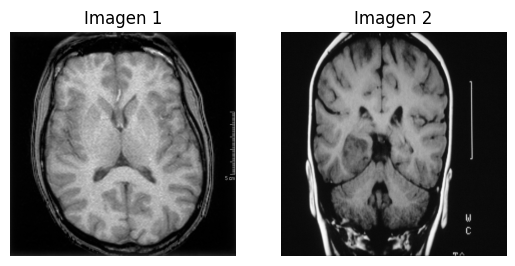

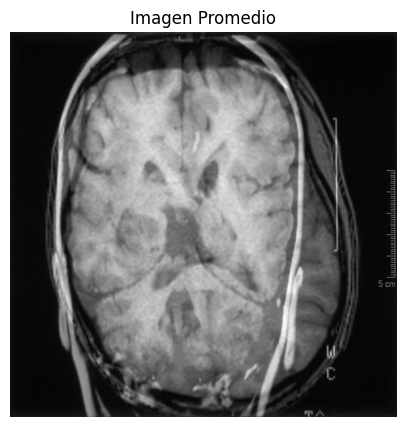

In [2]:
# Cargar varias imágenes
imagenes = ["/content/IMG_1.jpg","/content/IMG_2.jpg"]
imagenes_cargadas = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in imagenes]

# Verificar que todas las imágenes tengan el mismo tamaño
alto, ancho = imagenes_cargadas[0].shape
imagenes_cargadas = [cv2.resize(img, (ancho, alto)) for img in imagenes_cargadas]

# Crear una imagen acumuladora en formato flotante
suma = np.zeros((alto, ancho), dtype=np.float32)

# Sumar todas las imágenes
for img in imagenes_cargadas:
    suma += img

# Calcular el promedio dividiendo por la cantidad de imágenes
imagen_promedio = suma / len(imagenes_cargadas)

# Convertir la imagen a formato uint8 para visualización
imagen_promedio = cv2.convertScaleAbs(imagen_promedio)

# Mostrar imágenes originales
for i, img in enumerate(imagenes_cargadas):
    plt.subplot(1, len(imagenes), i+1)  # Crear subgráficos en una fila
    plt.imshow(img, cmap="gray")  # Mostrar imagen
    plt.title(f"Imagen {i+1}")  # Título de cada imagen
    plt.axis("off")  # Ocultar ejes

#Mostrar imagen promedio
plt.figure(figsize=(5, 5))
plt.imshow(imagen_promedio, cmap="gray")
plt.title("Imagen Promedio")
plt.axis("off")
plt.show()

## *Ejercicio 2: Resta de imágenes.*

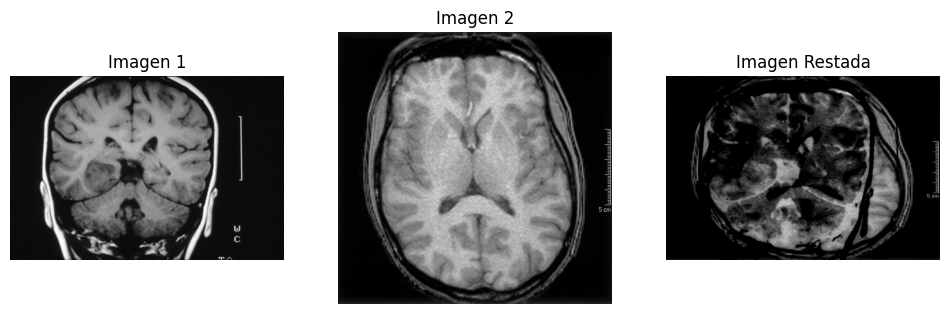

In [3]:
# Realizar la resta de imágenes
resta = cv2.subtract(img2_res, img1_res)  # OpenCV maneja el rango automáticamente

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(resta, cmap='gray')
plt.title("Imagen Restada")
plt.axis("off")

plt.show()

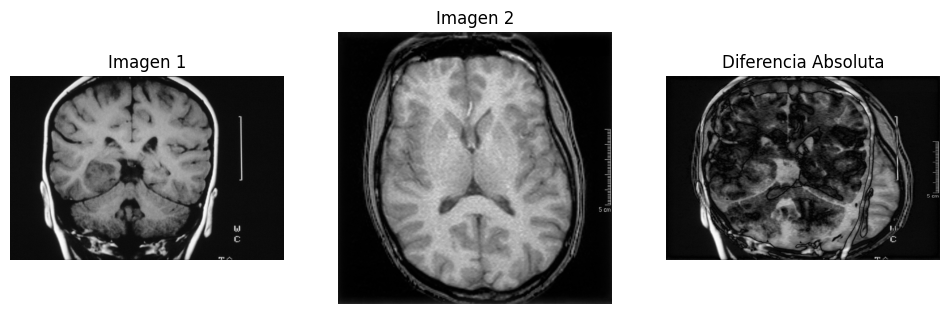

In [4]:
# Realizar la resta de imágenes usando cv2.absdiff para evitar valores negativos
diferencia_absoluta = cv2.absdiff(img2_res, img1_res)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(diferencia_absoluta, cmap='gray')
plt.title("Diferencia Absoluta")
plt.axis("off")

plt.show()

## *Ejercicio 3: Multiplicación por un factor*

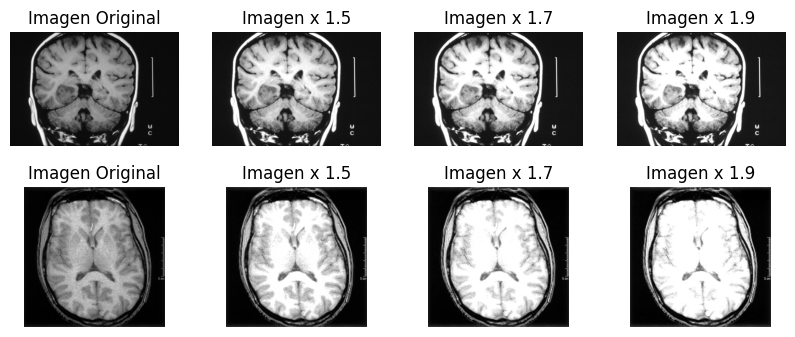

In [5]:
# Definir el factor de multiplicación
factor50 = 1.5  # Aumenta el brillo en un 50%
factor70 = 1.7  # Aumenta el brillo en un 70%
factor90 = 1.9  # Aumenta el brillo en un 90%

# Multiplicar la imagen por el factor
img1_multiplicada50 = cv2.multiply(img1, np.array([factor50], dtype=np.float32))
img1_multiplicada70 = cv2.multiply(img1, np.array([factor70], dtype=np.float32))
img1_multiplicada90 = cv2.multiply(img1, np.array([factor90], dtype=np.float32))
img2_multiplicada50 = cv2.multiply(img2, np.array([factor50], dtype=np.float32))
img2_multiplicada70 = cv2.multiply(img2, np.array([factor70], dtype=np.float32))
img2_multiplicada90 = cv2.multiply(img2, np.array([factor90], dtype=np.float32))

# Convertir la imagen a uint8 para visualización correcta
img1_multiplicada50 = cv2.convertScaleAbs(img1_multiplicada50)
img1_multiplicada70 = cv2.convertScaleAbs(img1_multiplicada70)
img1_multiplicada90 = cv2.convertScaleAbs(img1_multiplicada90)
img2_multiplicada50 = cv2.convertScaleAbs(img2_multiplicada50)
img2_multiplicada70 = cv2.convertScaleAbs(img2_multiplicada70)
img2_multiplicada90 = cv2.convertScaleAbs(img2_multiplicada90)

# Mostrar la imagen original y la modificada
plt.figure(figsize=(10, 4))

plt.subplot(2, 4, 1)
plt.imshow(img1, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.imshow(img1_multiplicada50, cmap='gray')
plt.title(f"Imagen x {factor50}")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.imshow(img1_multiplicada70, cmap='gray')
plt.title(f"Imagen x {factor70}")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.imshow(img1_multiplicada90, cmap='gray')
plt.title(f"Imagen x {factor90}")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.imshow(img2, cmap='gray')
plt.title("Imagen Original")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.imshow(img2_multiplicada50, cmap='gray')
plt.title(f"Imagen x {factor50}")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.imshow(img2_multiplicada70, cmap='gray')
plt.title(f"Imagen x {factor70}")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.imshow(img2_multiplicada90, cmap='gray')
plt.title(f"Imagen x {factor90}")
plt.axis("off")

plt.show()


## *Ejercicio 4: Multiplicación elemento por elemento*


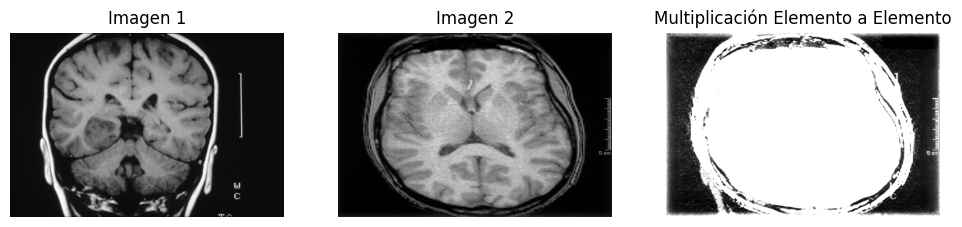

In [6]:
# Multiplicación elemento a elemento
img_multiplicada = cv2.multiply(img2_res, img1_res)  # OpenCV maneja el rango automáticamente

# Convertir la imagen resultante a uint8
img_multiplicada = cv2.convertScaleAbs(img_multiplicada)

# Mostrar imágenes originales y resultado
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img1_res, cmap='gray')
plt.title("Imagen 1")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img2_res, cmap='gray')
plt.title("Imagen 2")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_multiplicada, cmap='gray')
plt.title("Multiplicación Elemento a Elemento")
plt.axis("off")

plt.show()

# Parte II.- Operaciones lógicas

## *Ejercicio 5: Operaciones lógicas AND, OR, XOR y NOT*

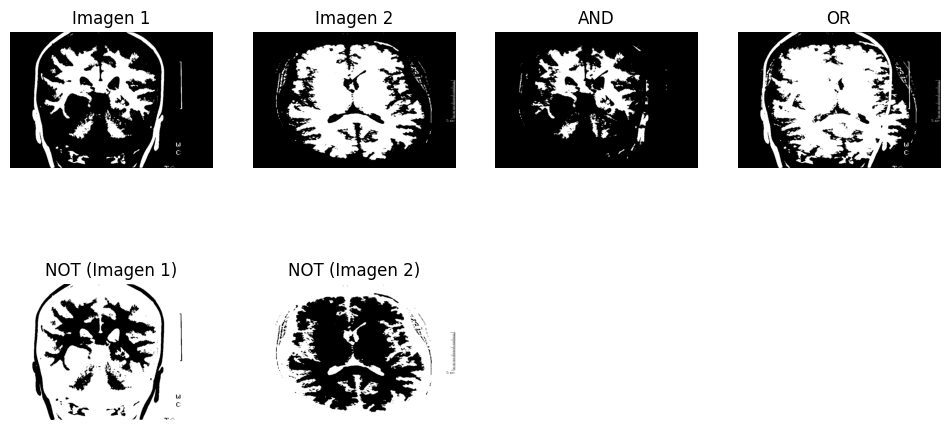

In [7]:
# Segmentar una imagen con un umbral

# Aplicar un umbral fijo
umbral = 130  # Cambia este valor según el nivel deseado
_, imagen_segmentada1 = cv2.threshold(img1_res, umbral, 255, cv2.THRESH_BINARY)
_, imagen_segmentada2 = cv2.threshold(img2_res, umbral, 255, cv2.THRESH_BINARY)

# Aplicar operaciones lógicas
and_img = cv2.bitwise_and(imagen_segmentada1, imagen_segmentada2)  # AND lógico
or_img = cv2.bitwise_or(imagen_segmentada1, imagen_segmentada2)    # OR lógico
xor_img = cv2.bitwise_xor(imagen_segmentada1, imagen_segmentada2)  # XOR lógico
not_img1 = cv2.bitwise_not(imagen_segmentada1)       # NOT lógico en img1
not_img2 = cv2.bitwise_not(imagen_segmentada2)       # NOT lógico en img2

# Mostrar las imágenes
titles = ["Imagen 1", "Imagen 2", "AND", "OR", "NOT (Imagen 1)", "NOT (Imagen 2)", "XOR"]
images = [imagen_segmentada1, imagen_segmentada2, and_img, or_img, not_img1, not_img2, xor_img]

plt.figure(figsize=(12, 6))

for i in range(6):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()